In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from pysolar.solar import *
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Importando o arquivo dat para o pandas e definindo seus tipos
df = pd.read_csv('table1modified.csv', index_col=0)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric)
display(df)

# Dados de localização
latitude = 37.7510
longitude = -97.8220



,TIMESTAMP,RECORD,PTemp_C,AirTC_Avg,AirTC_Max,AirTC_Min,AirTC_Std,RH_Max,RH_Min,Rain_mm_Tot,...,CMP21_Difuse_T_C_Max,Pyrh_Irrad_Avg,Pyrh_Irrad_Max,Pyrh_Irrad_Min,Pyrh_Irrad_Std,Pyrh_Temp_Avg,Pyrh_Temp_Max,DNI,Angle,Azimuth
1,2016-05-16 04:31:00-03:00,643470,19.49,21.81,21.89,21.76,0.037,79.44,78.35,0.0,...,21.28,232.0,242.5,220.7,6.554,28.99,29.03,65.3,-31.114769,17.520008
2,2016-05-16 04:32:00-03:00,643471,19.57,21.72,21.76,21.62,0.033,78.35,77.71,0.0,...,21.33,203.9,220.7,191.0,9.770,29.08,29.15,58.1,-31.054673,17.786563
3,2016-05-16 04:33:00-03:00,643472,19.65,21.59,21.66,21.52,0.038,77.71,77.40,0.0,...,21.37,187.1,190.2,185.6,1.156,29.17,29.19,54.2,-30.993704,18.052678
4,2016-05-16 04:34:00-03:00,643473,19.73,21.48,21.55,21.42,0.032,77.95,77.44,0.0,...,21.46,198.6,205.8,187.1,5.413,29.24,29.28,58.2,-30.931862,18.318348
5,2016-05-16 04:35:00-03:00,643474,19.81,21.46,21.52,21.38,0.029,78.42,77.88,0.0,...,21.47,206.0,217.5,194.9,8.210,29.32,29.36,61.1,-30.869151,18.583567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305184,2017-04-19 05:02:00-03:00,1130224,24.78,23.26,23.32,23.22,0.023,73.32,72.03,0.0,...,26.58,106.4,116.9,100.6,4.199,32.83,32.87,55.7,-36.478808,28.349362
305185,2017-04-19 05:03:00-03:00,1130225,24.81,23.12,23.25,23.05,0.042,72.78,71.72,0.0,...,26.58,191.6,381.2,118.5,79.250,32.85,32.91,95.9,-36.384286,28.630573
305186,2017-04-19 05:04:00-03:00,1130226,24.92,23.15,23.19,23.08,0.029,72.64,71.96,0.0,...,26.58,361.6,415.5,302.4,39.420,32.92,33.00,174.5,-36.288913,28.910997
305187,2017-04-19 05:05:00-03:00,1130227,25.07,23.15,23.22,23.08,0.032,72.57,71.69,0.0,...,26.58,423.3,457.6,384.3,23.940,32.99,33.04,204.6,-36.192696,29.190631


Index(['TIMESTAMP', 'RECORD', 'PTemp_C', 'AirTC_Avg', 'AirTC_Max', 'AirTC_Min',
       'AirTC_Std', 'RH_Max', 'RH_Min', 'Rain_mm_Tot', 'WS_ms_Avg',
       'WS_ms_Max', 'WS_ms_Min', 'WS_ms_Std', 'WindDir', 'BP_kPa_Avg',
       'BP_kPa_Max', 'BP_kPa_Min', 'BP_kPa_Std', 'TdC_Avg', 'TdC_Max',
       'TdC_Min', 'TdC_Std', 'Slr_Irrad_Global_Avg', 'Slr_Irrad_Global_Max',
       'Slr_Irrad_Global_Min', 'Slr_Irrad_Global_Std', 'Slr_Irrad_Difuse_Avg',
       'Slr_Irrad_Difuse_Max', 'Slr_Irrad_Difuse_Min', 'Slr_Irrad_Difuse_Std',
       'CMP21_Global_T_C_Avg', 'CMP21_Global_T_C_Max', 'CMP21_Difuse_T_C_Avg',
       'CMP21_Difuse_T_C_Max', 'Pyrh_Irrad_Avg', 'Pyrh_Irrad_Max',
       'Pyrh_Irrad_Min', 'Pyrh_Irrad_Std', 'Pyrh_Temp_Avg', 'Pyrh_Temp_Max',
       'DNI', 'Angle', 'Azimuth'],
      dtype='object')


,Slr_Irrad_Global_Avg,Slr_Irrad_Difuse_Avg,CMP21_Global_T_C_Avg,CMP21_Difuse_T_C_Avg,Pyrh_Irrad_Avg,DNI
1,179.7,114.4,21.55,21.25,232.0,65.3
2,173.7,115.6,21.62,21.29,203.9,58.1
3,171.1,116.9,21.65,21.37,187.1,54.2
4,176.7,118.5,21.71,21.38,198.6,58.2
5,181.1,120.0,21.74,21.45,206.0,61.1
...,...,...,...,...,...,...
305184,181.5,125.8,24.01,26.54,106.4,55.7
305185,216.0,120.1,24.06,26.56,191.6,95.9
305186,290.6,116.1,24.07,26.58,361.6,174.5
305187,319.8,115.2,24.11,26.58,423.3,204.6


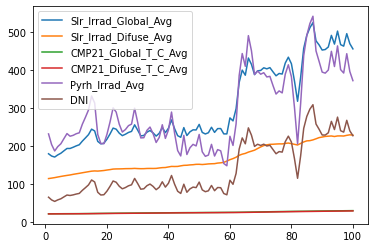

In [12]:
print(df.columns)
radiations = df[['Slr_Irrad_Global_Avg','Slr_Irrad_Difuse_Avg', 'CMP21_Global_T_C_Avg','CMP21_Difuse_T_C_Avg','Pyrh_Irrad_Avg','DNI']]
radiations[0:100].plot()

display(radiations)

In [79]:
#Conversão de data e fuso horário
#df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df.index = df['TIMESTAMP']

In [80]:
# dataframe para 1h

# Média/acc das últimas 12h
df['DNI 12h mean'] = df['DNI'].rolling(720).mean()
df['T 12h mean'] = df['AirTC_Avg'].rolling(720).mean()
df['Rain 12h acc'] = df['Rain_mm_Tot'].rolling(720).sum()
df['P 12h mean'] = df['BP_kPa_Avg'].rolling(720).mean()
df['RH 12h mean'] = df['RH_Max'].rolling(720).mean()

# Média/acc das últimas 6h
df['DNI 6h mean'] = df['DNI'].rolling(360).mean()
df['T 6h mean'] = df['AirTC_Avg'].rolling(360).mean()
df['Rain 6h acc'] = df['Rain_mm_Tot'].rolling(360).sum()
df['P 6h mean'] = df['BP_kPa_Avg'].rolling(360).mean()
df['RH 6h mean'] = df['RH_Max'].rolling(360).mean()

# Soma de toda a DNI em 12h (Em MJ/m²)
df['DNI acc 12h'] = df['DNI'].rolling(720).sum()*60/1000000

# Target será o valor deslocado 1h pra frente
df['Target'] = df['DNI acc 12h'].shift(-720)

df = df.dropna()
display(df)

,TIMESTAMP,RECORD,PTemp_C,AirTC_Avg,AirTC_Max,AirTC_Min,AirTC_Std,RH_Max,RH_Min,Rain_mm_Tot,...,Rain 12h acc,P 12h mean,RH 12h mean,DNI 6h mean,T 6h mean,Rain 6h acc,P 6h mean,RH 6h mean,DNI acc 12h,Target
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2016-05-16 16:30:00-03:00,2016-05-16 16:30:00-03:00,644189,23.81,24.74,24.78,24.68,0.026,67.00,66.83,0.0,...,0.000,100.998333,48.734111,85.320750,29.879556,0.000000e+00,100.818889,47.658556,9.260758,0.088329
2016-05-16 16:31:00-03:00,2016-05-16 16:31:00-03:00,644190,23.81,24.79,24.89,24.75,0.033,66.96,66.66,0.0,...,0.000,100.997778,48.716778,84.551028,29.854167,0.000000e+00,100.819167,47.742778,9.256840,0.094443
2016-05-16 16:32:00-03:00,2016-05-16 16:32:00-03:00,644191,23.78,24.92,25.02,24.82,0.054,66.66,65.98,0.0,...,0.000,100.997222,48.700542,84.008528,29.829139,0.000000e+00,100.819444,47.824861,9.253354,0.101013
2016-05-16 16:33:00-03:00,2016-05-16 16:33:00-03:00,644192,23.78,25.12,25.26,25.02,0.068,65.98,65.23,0.0,...,0.000,100.996667,48.684250,83.506306,29.805556,0.000000e+00,100.819722,47.906944,9.250102,0.106185
2016-05-16 16:34:00-03:00,2016-05-16 16:34:00-03:00,644193,23.78,25.37,25.50,25.23,0.074,65.19,64.34,0.0,...,0.000,100.996111,48.666528,82.965750,29.783333,0.000000e+00,100.820000,47.985611,9.246610,0.108345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-18 17:02:00-03:00,2017-04-18 17:02:00-03:00,1129504,21.45,22.27,22.30,22.23,0.026,73.19,73.05,0.0,...,0.254,101.677083,63.670958,21.034628,24.322444,4.440892e-14,101.663611,64.518194,6.471065,0.477897
2017-04-18 17:03:00-03:00,2017-04-18 17:03:00-03:00,1129505,21.48,22.26,22.30,22.17,0.028,73.36,73.05,0.0,...,0.254,101.677222,63.667611,21.019628,24.313556,4.440892e-14,101.664167,64.545083,6.455501,0.483651
2017-04-18 17:04:00-03:00,2017-04-18 17:04:00-03:00,1129506,21.48,22.23,22.30,22.17,0.026,73.59,73.36,0.0,...,0.254,101.677361,63.664250,21.003517,24.305000,4.440892e-14,101.664722,64.570639,6.439415,0.494121


In [81]:
# Selecionando o Target
y = df.Target

# Selecionando as Features
#features = ['T 6h mean','Rain 6h acc', 'P 6h mean', 'DNI 12h mean', 'T 12h mean', 'Rain 12h acc', 'P 12h mean', 'Angle', 'DNI 6h mean', 'DNI 12h mean', 'DNI acc 12h', 'Azimuth', 'RH 12h mean', 'RH 6h mean']

# Sem o DNI
features = ['T 6h mean', 'P 6h mean', 'T 12h mean', 'P 12h mean', 'Angle', 'Azimuth', 'RH 12h mean', 'RH 6h mean']
X = df[features]

# Separando o treino da validação do modelo
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

In [82]:
print('Features')
display(X)
print('Target')
display(y)

Features


,T 6h mean,P 6h mean,T 12h mean,P 12h mean,Angle,Azimuth,RH 12h mean,RH 6h mean
TIMESTAMP,,,,,,,,
2016-05-16 16:30:00-03:00,29.879556,100.818889,29.946569,100.998333,67.128111,220.705297,48.734111,47.658556
2016-05-16 16:31:00-03:00,29.854167,100.819167,29.950708,100.997778,66.998709,221.211223,48.716778,47.742778
2016-05-16 16:32:00-03:00,29.829139,100.819444,29.955153,100.997222,66.868000,221.712245,48.700542,47.824861
2016-05-16 16:33:00-03:00,29.805556,100.819722,29.960056,100.996667,66.736006,222.208398,48.684250,47.906944
2016-05-16 16:34:00-03:00,29.783333,100.820000,29.965458,100.996111,66.602751,222.699720,48.666528,47.985611
...,...,...,...,...,...,...,...,...
2017-04-18 17:02:00-03:00,24.322444,101.663611,25.117333,101.677083,56.388106,223.568244,63.670958,64.518194
2017-04-18 17:03:00-03:00,24.313556,101.664167,25.114819,101.677222,56.251641,223.935779,63.667611,64.545083
2017-04-18 17:04:00-03:00,24.305000,101.664722,25.112167,101.677361,56.114266,224.300900,63.664250,64.570639


Target


TIMESTAMP
2016-05-16 16:30:00-03:00    0.088329
2016-05-16 16:31:00-03:00    0.094443
2016-05-16 16:32:00-03:00    0.101013
2016-05-16 16:33:00-03:00    0.106185
2016-05-16 16:34:00-03:00    0.108345
                               ...   
2017-04-18 17:02:00-03:00    0.477897
2017-04-18 17:03:00-03:00    0.483651
2017-04-18 17:04:00-03:00    0.494121
2017-04-18 17:05:00-03:00    0.506397
2017-04-18 17:06:00-03:00    0.520359
Name: Target, Length: 303749, dtype: float64

In [83]:
# Aplicação do modelo e cálculo da MAE
rf_model = RandomForestRegressor(random_state=0, n_jobs=-1)
rf_model.fit(train_X, train_y)
predictions = rf_model.predict(val_X)
mae = mean_absolute_error(val_y, predictions)
print(f'MAE: {mae}')


MAE: 0.03440573482146448


In [84]:
# Tabela de comparação estimado vs medida
tabela_comparativa = pd.DataFrame(val_y)
tabela_comparativa['Prediction'] = predictions
tabela_comparativa['Error'] = abs(tabela_comparativa['Prediction'] - tabela_comparativa['Target'])

tabela_comparativa = tabela_comparativa.sort_index()
display(tabela_comparativa)
tabela_comparativa.describe()

,Target,Prediction,Error
TIMESTAMP,,,
2016-05-16 16:44:00-03:00,0.148953,0.148961,0.000009
2016-05-16 16:54:00-03:00,0.217335,0.218746,0.001412
2016-05-16 16:58:00-03:00,0.225483,0.224367,0.001116
2016-05-16 16:59:00-03:00,0.229347,0.228658,0.000689
2016-05-16 17:02:00-03:00,0.236823,0.236654,0.000169
...,...,...,...
2017-04-18 16:49:00-03:00,0.418719,0.418741,0.000022
2017-04-18 16:51:00-03:00,0.422241,0.421077,0.001164
2017-04-18 16:55:00-03:00,0.430887,0.425621,0.005266


,Target,Prediction,Error
count,75938.000000,75938.000000,75938.000000
mean,5.242343,5.243609,0.034406
std,6.138184,6.122107,0.136318
min,-0.061683,-0.061486,0.000000
25%,0.157600,0.181405,0.000149
50%,2.490669,2.512598,0.004421
75%,9.236193,9.230128,0.024649
max,26.982538,26.982434,12.835569


slope: 0.997122, intercept: 0.016354
R-squared: 0.999481
Mean Absolute Error (MAE): 0.034406 MJ/m²
Root Mean Squared Error (RMSE): 0.140592 MJ/m²
Relative Root Mean Squared Error (rRMSE): 2.681863 
Features utilizadas: 
- T 6h mean
- P 6h mean
- T 12h mean
- P 12h mean
- Angle
- Azimuth
- RH 12h mean
- RH 6h mean


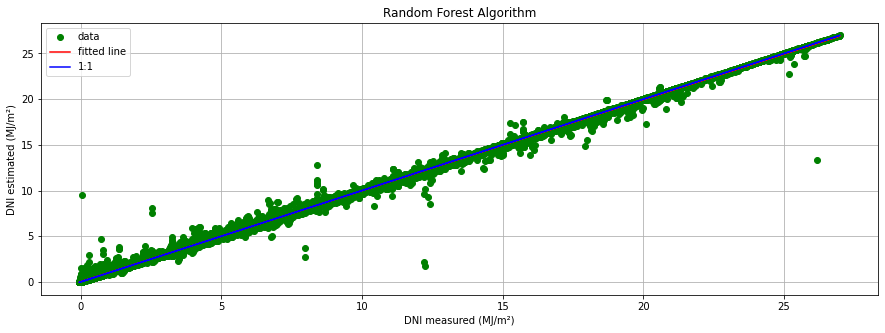

In [85]:
# Análise dos resultados
y= tabela_comparativa['Prediction']
x= tabela_comparativa['Target']

rmse = mean_squared_error(y, x)**(1/2)
media_medidas = float(tabela_comparativa['Target'].mean())

rrmse = (rmse*100)/(media_medidas)


# Regressão linear
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print("slope: %f, intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
print("Mean Absolute Error (MAE): %f MJ/m²" % mae)
print("Root Mean Squared Error (RMSE): %f MJ/m²" % rmse)
print("Relative Root Mean Squared Error (rRMSE): %f " % rrmse)
print("Features utilizadas: ")
for feature in features:
    print('- ' + feature)

plt.figure(figsize=(15, 5))
plt.plot(x, y, 'o', label='data', c='green')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.plot(x, x, 'b', label='1:1')
plt.title("Random Forest Algorithm")
plt.xlabel("DNI measured (MJ/m²)")
plt.ylabel("DNI estimated (MJ/m²)")
plt.legend()
plt.grid()
plt.show()

<AxesSubplot:xlabel='TIMESTAMP'>

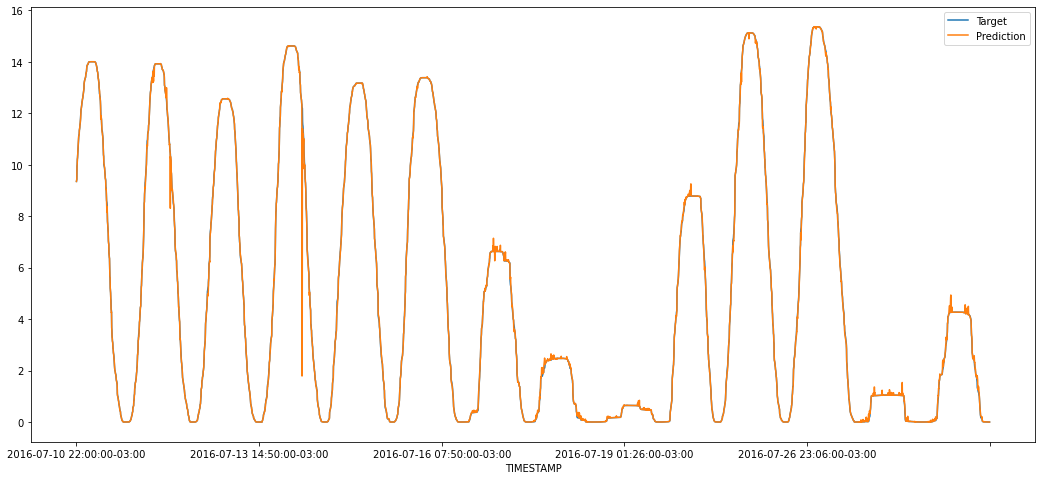

In [90]:
tabela_comparativa[20000:25000].plot(y=['Target', 'Prediction'], figsize=[18,8])